# Data Wrangling WeRateDogs
By: Mohamed Fathi Saleh

* The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

## Gathering the data

1) **twitter-archive-enhanced.csv**: is download manually from udacity resource files presented in the project

2) **image_predictions.tsv** : is downloaded programmatically using the link provided in the course .. this should be done using the requests library

3) **tweet_json.txt** : tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library 

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import os
from collections import Counter
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import json
import tweepy

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)

In [3]:
pd.set_option('display.min_rows', 50)

In [4]:
os.chdir('Desktop\Data wrangling')

In [5]:
os.listdir()

['Act Report.docx',
 'Act Report.pdf',
 'hbar.png',
 'hist.png',
 'image_prediction.tsv',
 'pie.png',
 'Project (Data Wrangling)',
 'scatter.png',
 'tweet-json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_final.csv',
 'Wrangling Report.docx',
 'Wrangling Report.pdf']

1) Twitter Archive File

In [6]:
# import twitter archive with read_csv method
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2) Image prediction file : programmatically

In [8]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# get the response of url and ensure it is a valid response
r = requests.get(url)

# save the response in a new file
with open('image_prediction.tsv', 'wb') as f:
    f.write(r.content)

# convert it into dataframe
df_image = pd.read_csv('image_prediction.tsv', sep='\t')

In [9]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3) Twitter json file

In [10]:
df_1['tweet_id'].isnull().sum(), len(df_1['tweet_id'].index)

(0, 2356)

### tweet-json.txt is downloaded manually for further data analysis

In [11]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'


#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in df_1['tweet_id']:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [13]:
json_list = {}

df_json = pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'favorite_count', 'retweet'])
# Open the file which contain json of all tweets
with open('tweet-json.txt', encoding='utf-8') as f:
    for tweet_dict in f:
        # extract all necessary data
        data = json.loads(tweet_dict)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        retweet = data['retweeted']
        df_json = df_json.append({'tweet_id': tweet_id,
                                  'retweet_count': retweet_count,
                                  'favorite_count': favorite_count,
                                  'retweet': retweet},ignore_index=True)
df_json.head()

,tweet_id,retweet_count,favorite_count,retweet
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


In [14]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
 3   retweet         2354 non-null   object
dtypes: object(4)
memory usage: 73.7+ KB


# Data Assessment

## Visual Assessment

In [15]:
df_1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1659,683098815881154561,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,12,10,None,None,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1101,735635087207878657,NaN,NaN,2016-05-26 00:54:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dakota. He hasn't grow into his skin y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735635087...,11,10,Dakota,None,None,None,None
1500,692158366030913536,NaN,NaN,2016-01-27 01:33:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,None,None,None,None
2273,667470559035432960,NaN,NaN,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667470559...,11,10,a,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None
1868,675166823650848770,NaN,NaN,2015-12-11 04:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnold. He broke his leg saving a hand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,None,None,None,None
1356,703425003149250560,7.030419e+17,4.196984e+09,2016-02-27 03:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Really guys? Again? I know this is a rare Alba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703425003...,9,10,None,None,None,None,None
1942,673711475735838725,NaN,NaN,2015-12-07 03:51:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673711475...,10,10,None,None,None,None,None
381,827324948884643840,NaN,NaN,2017-02-03 01:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphie. He's being treated for an ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827324948...,12,10,Ralphie,None,None,None,None


In [16]:
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1704,817415592588222464,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,1,Doberman,0.806163,True,black-and-tan_coonhound,0.097386,True,miniature_pinscher,0.085993,True
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,1,Labrador_retriever,0.495047,True,Chesapeake_Bay_retriever,0.350188,True,golden_retriever,0.142400,True
1754,824775126675836928,https://pbs.twimg.com/media/C3Iwlr0WYAARVh4.jpg,1,Border_terrier,0.610499,True,malinois,0.090291,True,Airedale,0.068625,True
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,beagle,0.162585,True,Pembroke,0.120481,True,Siberian_husky,0.110284,True
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,1,Labrador_retriever,0.769412,True,golden_retriever,0.144893,True,lion,0.021440,False
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False


In [17]:
df_json.sample(20)

,tweet_id,retweet_count,favorite_count,retweet
236,847157206088847362,6572,21588,False
2352,666029285002620928,48,132,False
377,827933404142436356,5987,22180,False
1495,692423280028966913,265,1618,False
1727,679862121895714818,706,2678,False
2128,670093938074779648,365,1106,False
1349,704054845121142784,1028,3201,False
472,816336735214911488,2269,9564,False
2203,668633411083464705,1788,3024,False
804,772114945936949249,546,3005,False


## Programmatic Assessment

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
df_1.duplicated().sum()

0

In [21]:
df_1['name'].value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
Bailey              7
an                  7
Jack                6
Scout               6
Koda                6
Jax                 6
Stanley             6
Leo                 6
Dave                6
                 ... 
Pancake             1
Zara                1
Michelangelope      1
Socks               1
Sonny               1
Dante               1
Chase               1
Blue                1
Colin               1
Comet               1
Tito                1
Maks                1
Rooney              1
Cannon              1
Pete                1
Karll               1
Remy                1
Darby               1
Baron               1
Derby     

In [22]:
df_1[df_1.name.str[1:] == ""]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None


In [23]:
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
df_1.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [25]:
df_1[df_1['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [26]:
df_1[df_1['rating_numerator'] > 100]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [27]:
df_1[df_1['in_reply_to_status_id'].notnull()].shape[0]

78

In [28]:
df_image['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [29]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df_image[df_image['img_num'] == 4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


In [31]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
df_image.duplicated().sum()

0

In [33]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
 3   retweet         2354 non-null   object
dtypes: object(4)
memory usage: 73.7+ KB


In [34]:
df_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
retweet           0
dtype: int64

In [35]:
df_json['retweet'].sum()

0

In [36]:
df_json.duplicated().sum()

0

## * Quality Issues 

   ### Twitter Archive Dataframe
   1) source column need to extract the source of user entry like iphone from the text
   
   2) retweeted_status_id column and in_reply_to_status_id will be used to extract a retweet or reply to original tweet and delete the rows so that only original tweets is subjected to analysis
   
   3) unnecessary column for assessment like in_reply_to_status_id , in_reply_to_user_id ,retweeted_status_user_id, retweeted_status_timestamp

   4) invalid and inaccurate data entry in rating_numerator and  rating_denominator columns for example some of the data entry with id 749981277374128128 the rating is 	1776/10
   
   5) the None value in name doggo, floofer, pupper, puppo instead of np.nan values for better assessment
   
   6) the data type in tweet_id column is int instead of string and timestamp column is object instead of datetime
   
   7) the dog name is avaiable with a single charater, with name an or the that isn't a valid name. None value as a string is present in the dog name.
   
   8) rating_denominator column has values of more than 10 .. conversion of all values to 10 for better assessment is required instead of deleting the data
   
   9) extremely high value in rating_numerator that is unrealistic in rating like 1776 values
   
   
   

   ### Image Prediction
   1) Values of remaining columns of the prediction values is presented in more than one column with 3 prediction columns that is hard to assess
   
   2) tweet_id column type is int instead of str

   ### Twitter-Json 
   1) all of retweet column is of False value so all rows are valid for further analysis
   
   2) no duplicated or missing values in the whole df_json column

## * Tidiness Issues 

   1) multiple column in twitter archive tables that is duplicated in its values stored in both rows and columns
   
   2) Different column names [doggo, floofer, pupper, puppo] that measure the same thing 
   
   3) two tweet_id columns in both df_1 dataframe AND image_prediction dataframe 
   
   4) two tweet_id columns in both df_1 dataframe AND tweet_json dataframe 

# Cleaning the Dataset

In [37]:
# make a copy of each dataframe so that we can return to the original dataset if an error occur
df1_copy = df_1.copy()
image_copy = df_image.copy()
json_copy = df_json.copy()

### Cleaning I
### Define
retweeted_status_id column and in_reply_to_status_id will be used to extract a retweet or reply from original tweet and delete the rows that represents a retweet or reply from the DataFrame so that only original tweets is subjected to analysis

### code

In [38]:
df1_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [39]:
# filteration criteria of retweeted and reply tweets
filt_1 = df1_copy['in_reply_to_status_id'].notnull()
filt_2 = df1_copy['retweeted_status_id'].notnull()

# remove reply tweets and retweet
df1_copy.drop(df1_copy[filt_1].index, inplace=True)
df1_copy.drop(df1_copy[filt_2].index, inplace=True)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


### Test

In [40]:
df1_copy['in_reply_to_status_id'].notnull().sum(), df1_copy['retweeted_status_id'].notnull().sum()

(0, 0)

### Cleaning II
### Define
Remove unnecessary columns for assessment like in_reply_to_status_id , in_reply_to_user_id ,retweeted_status_user_id, retweeted_status_timestamp

### code

In [41]:
df1_copy.columns ,df1_copy.shape[1]

(Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
        'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
        'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
       dtype='object'),
 17)

In [42]:
df1_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
        'retweeted_status_timestamp'], inplace=True)

### Test

In [43]:
df1_copy.columns, df1_copy.shape[1]

(Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
        'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
        'pupper', 'puppo'],
       dtype='object'),
 12)

### Cleaning III

### Define
The name column change to dog_name and remove dog name with a single charater OR with name [an or the] that isn't considered a valid name. None value as a string is present in the dog name.

### code

In [44]:
df1_copy.rename(columns={'name':'dog_name'},inplace=True)
df1_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

In [45]:
filt = df1_copy['dog_name'].str[1:] == ""

# remove invalid dog_name from analysis
df1_copy.loc[filt,'dog_name'] = np.nan

In [46]:
# convert None , an , the into np.nan values
df1_copy['dog_name'].replace('None', np.nan, inplace=True)
df1_copy['dog_name'].replace({'an': np.nan,'the':np.nan}, inplace=True)

In [47]:
df1_copy.loc[df1_copy['dog_name'].str.islower() == True,'dog_name'] = np.nan
df1_copy['dog_name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22           NaN
23        Canela
24           NaN
25           NaN
          ...   
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: dog_name, Length: 2097, dtype: object

### Test

In [48]:
df1_copy['dog_name'].isnull().sum()

708

In [49]:
df1_copy['dog_name'].value_counts()

Charlie           11
Lucy              11
Cooper            10
Oliver            10
Tucker             9
Penny              9
Sadie              8
Winston            8
Lola               8
Daisy              7
Toby               7
Jax                6
Oscar              6
Stanley            6
Bailey             6
Bo                 6
Koda               6
Bella              6
Dave               5
Bentley            5
Buddy              5
Chester            5
Scout              5
Milo               5
Leo                5
                  ..
Darby              1
Remy               1
Karll              1
Sonny              1
Timison            1
Charl              1
Jaspers            1
Amélie             1
Duchess            1
Leela              1
Clarkus            1
Mosby              1
Michelangelope     1
Dante              1
Cannon             1
Chase              1
Blue               1
Klein              1
Colin              1
Comet              1
Tito               1
Maks         

### Cleaning IV

### Define

Extract from source column the source of user entry like iphone from the text in 'source' column

### code

In [50]:
df1_copy['Source'] = df1_copy['source'].str.extract(r'download\/(\w*)')
df1_copy['Source'].value_counts()
df1_copy.drop(columns='source', inplace= True)

In [51]:
df1_copy['Source'].value_counts()
# all source for download is iphone .. remove the source column as it is invaluable information for analysis
df1_copy.drop(columns='Source', inplace=True)

### Test

In [52]:
df1_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'doggo', 'floofer', 'pupper',
       'puppo'],
      dtype='object')

### Cleaning V

### Define
 Change the datatype of some columns in the data :Change the dtype in tweet_id column from int to string and timestamp column from object to datetime

### code

In [53]:
df1_copy['tweet_id'] = df1_copy['tweet_id'].astype(str)
df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'])

### Test

In [54]:
df1_copy.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
dog_name                           object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Cleaning VI ( Tidiness Issue )

### Define
* multiple columns [doggo, floofer, pupper, puppo] in twitter archive tables that has its values duplicated and present in both rows and columns

* Different column names [doggo, floofer, pupper, puppo] that measure the same thing which is dog type

### code

In [55]:
df1_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'doggo', 'floofer', 'pupper',
       'puppo'],
      dtype='object')

In [56]:
df1_copy['doggo'].value_counts()[0],df1_copy['floofer'].value_counts()[0],df1_copy['pupper'].value_counts()[0],df1_copy['puppo'].value_counts()[0]

(2014, 2087, 1867, 2073)

In [57]:
filt = df1_copy.loc[(df1_copy[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]['tweet_id']
filt

191     855851453814013952
200     854010172552949760
460     817777686764523521
531     808106460588765185
575     801115127852503040
705     785639753186217984
733     781308096455073793
889     759793422261743616
956     751583847268179968
1063    741067306818797568
1113    733109485275860992
Name: tweet_id, dtype: object

In [58]:
df1_copy[['doggo','pupper','puppo','floofer']] = df1_copy[['doggo','pupper','puppo','floofer']].replace('None', np.nan)

In [59]:
id_col = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name']
df1_copy = pd.melt(df1_copy, id_vars= id_col, var_name='dog', value_name='dog_stage')

In [60]:
df1_copy = df1_copy.sort_values(['tweet_id','dog_stage'],ascending = [0,1]).drop_duplicates(subset='tweet_id')

In [61]:
df1_copy.loc[df1_copy['tweet_id'].isin(filt), 'dog_stage'] = 'multiple'

In [62]:
df1_copy.dog_stage.value_counts()

pupper      221
doggo        72
puppo        23
multiple     11
floofer       9
Name: dog_stage, dtype: int64

In [63]:
df1_copy.head(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,doggo,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,doggo,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,doggo,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,doggo,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo


In [64]:
df1_copy.drop('dog', axis=1, inplace=True)

In [65]:
df1_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'dog_name', 'dog_stage'],
      dtype='object')

### Test

In [66]:
df1_copy['dog_stage'].value_counts()

pupper      221
doggo        72
puppo        23
multiple     11
floofer       9
Name: dog_stage, dtype: int64

In [67]:
df1_copy.shape

(2097, 8)

### Cleaning VIII

### Define

* Rating_denominator column has values of more than 10 .. conversion of all values to 10 for better assessment is required instead of deleting the data


* Extremely high value in rating_numerator that is unrealistic in rating like 1776 values

### code

In [68]:
extract = df1_copy[df1_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

D:\anaconda\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [69]:
new_val = extract['text'].str.extract(r"(\d+\.\d*\/\d+)")[0].apply(lambda x: x.split('/')[0])

In [70]:
df1_copy.loc[extract.index,'rating_numerator'] = new_val

In [71]:
df1_copy.loc[extract.index]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
41,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,NaN
528,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN
4780,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper
1474,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,NaN


In [72]:
df1_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [73]:
# converting rating_numerator and denominator into int datatype
df1_copy['rating_numerator'] = df1_copy['rating_numerator'].astype(float)
df1_copy['rating_denominator'] = df1_copy['rating_denominator'].astype(float)

In [74]:
# fixing of rating_demoninator values more than 10
df1_copy.loc[df1_copy['rating_denominator'] > 10, 'rating_denominator'] = df1_copy['rating_denominator']*10 /df1_copy['rating_denominator']

In [75]:
df1_copy.loc[df1_copy['rating_denominator'] > 10, 'rating_numerator'] = df1_copy['rating_numerator']*10 /df1_copy['rating_denominator']

In [76]:
# fixing of rating_demoninator less than 10 

df1_copy.loc[df1_copy['rating_denominator'] < 10, 'rating_denominator'] = df1_copy['rating_denominator']*10 /df1_copy['rating_denominator']

df1_copy.loc[df1_copy['rating_denominator'] < 10, 'rating_numerator'] = df1_copy['rating_numerator']*10 /df1_copy['rating_denominator']

In [77]:
# remove inaccurate (unrealistic rating_numerator) that is defined as more than 10 fold the denominator
filt = df1_copy[df1_copy['rating_numerator'] > 100]
df1_copy.drop(filt.index, inplace=True)

### Test

In [78]:
df1_copy['rating_denominator'].value_counts()

10.0    2091
Name: rating_denominator, dtype: int64

In [79]:
df1_copy.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
dog_name                           object
dog_stage                          object
dtype: object

### Cleaning IX ( image_prediction DataFrame )

### Define

* Change the dtype of tweet_id column from the int into str dtype


* Values of remaining columns of the prediction values is presented in more than one column that is hard to assess. Combine all these values on one columns



### Code

In [80]:
image_copy['tweet_id'] = image_copy['tweet_id'].astype(str)

In [81]:
image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [82]:
# add 3 columns for the dog prediction that is True
image_copy['dog_prediction_1'] = np.where(image_copy['p1_dog']== True, image_copy['p1'], np.nan)

In [83]:
image_copy['dog_prediction_2'] = np.where(image_copy['p2_dog']== True, image_copy['p2'], np.nan)
image_copy['dog_prediction_3'] = np.where(image_copy['p3_dog']== True, image_copy['p3'], np.nan)

In [84]:
image_copy.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],inplace=True)

In [85]:
image_copy.head()

,tweet_id,jpg_url,img_num,dog_prediction_1,dog_prediction_2,dog_prediction_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,Rottweiler,Doberman


### Test

In [86]:
image_copy['tweet_id'].dtype

dtype('O')

In [87]:
image_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_prediction_1',
       'dog_prediction_2', 'dog_prediction_3'],
      dtype='object')

### Cleaning X

### Define

* Rating_denominator column has values of more than 10 .. conversion of all values to 10 for better assessment is required instead of deleting the data


* Extremely high value in rating_numerator that is unrealistic in rating like 1776 values

### code

### Test

### Cleaning XI ( json dataframe - Tidiness )

### Define

* Removal of retweet coloumn form dataframe : all of retweet column is of False value so all rows are valid for further analysis
* Change dtypes of retweet_count and favorite_count columns
* Merging of tweet_archive and json_text based on tweet_id column that is unique identifier in both dataframes

### code

In [88]:
json_copy.dtypes

tweet_id          object
retweet_count     object
favorite_count    object
retweet           object
dtype: object

In [89]:
json_copy.drop('retweet', axis=1, inplace=True)

In [90]:
json_copy['retweet_count'] = json_copy['retweet_count'].astype(int)
json_copy['favorite_count'] = json_copy['favorite_count'].astype(int)
json_copy['tweet_id'] = json_copy['tweet_id'].astype(str)

In [91]:
df_final = pd.merge(df1_copy, json_copy, on='tweet_id', how='left')

### Test

In [92]:
json_copy.dtypes

tweet_id          object
retweet_count      int32
favorite_count     int32
dtype: object

In [93]:
json_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [94]:
df_final.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048


### Cleaning XI ( image_prediction dataframe - Tidiness )

### Define

* Merging of tweet_archive and image prediction dataframes based on tweet_id column that is unique identifier in both dataframes

### code

In [95]:
df_twitter = pd.merge(df_final, image_copy, on='tweet_id', how='left')

In [96]:
filt_1 = df_twitter[df_twitter['jpg_url'].isnull()]
df_twitter.drop(filt_1.index, inplace=True)

### Test

In [97]:
df_twitter.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_prediction_1,dog_prediction_2,dog_prediction_3
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,malamute,kelpie
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,NaN,Labrador_retriever,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,English_springer,German_short-haired_pointer


In [98]:
df_twitter.shape

(1965, 15)

In [99]:
df_twitter.to_csv('twitter_archive_final.csv', index=False, encoding='utf-8')

# Storing, Analyzing, and Visualizing Data

In [100]:
df_twitter = pd.read_csv('twitter_archive_final.csv', parse_dates=['timestamp'])

In [101]:
df_twitter.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_prediction_1,dog_prediction_2,dog_prediction_3
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,Pekinese,papillon


In [102]:
c = Counter()
c.update(df_twitter['dog_prediction_1'])
c.update(df_twitter['dog_prediction_2'])
c.update(df_twitter['dog_prediction_3'])

In [103]:
del c[np.nan]

In [104]:
c_list = c.most_common(10)

In [105]:
dog_pred = []
dog_count = []
for item in c_list:
    dog_pred.append(item[0])
    dog_count.append(item[1])
    
dog_pred.reverse()
dog_count.reverse()

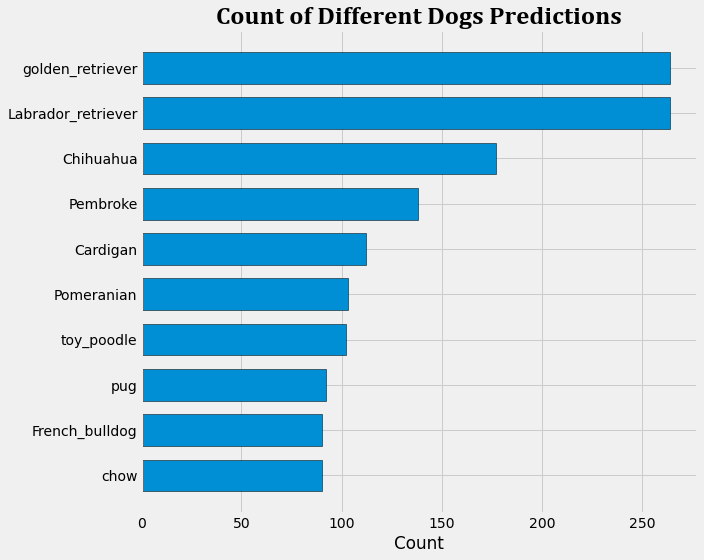

In [106]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,8))

plt.barh(dog_pred, dog_count, height=0.7, edgecolor='black')

plt.title('Count of Different Dogs Predictions', fontdict={'fontweight':'bold', 'fontsize':25, 'fontname':'cambria'})

plt.xlabel('Count')

plt.tight_layout()
plt.savefig('hbar.png', dpi=200)
plt.show()

In [107]:
# determining the twitter id with the highest retweet_count & favorite_count
df_twitter.nlargest(5, columns=['retweet_count'])[['tweet_id','retweet_count','rating_numerator']]

,tweet_id,retweet_count,rating_numerator
767,744234799360020481,79515,13.0
397,807106840509214720,56625,13.0
802,739238157791694849,52360,13.0
306,822872901745569793,48265,13.0
58,879415818425184262,45849,13.0


In [108]:
# determining the twitter id with the highest favorite_count
df_twitter.nlargest(5, columns=['favorite_count'])[['tweet_id','favorite_count', 'rating_numerator']]

,tweet_id,favorite_count,rating_numerator
306,822872901745569793,132810,13.0
767,744234799360020481,131075,13.0
58,879415818425184262,107956,13.0
397,807106840509214720,107015,13.0
108,866450705531457537,106827,13.0


In [109]:
stage = df_twitter['dog_stage'].value_counts()
name = stage.index
stage

pupper      201
doggo        63
puppo        22
multiple     10
floofer       7
Name: dog_stage, dtype: int64

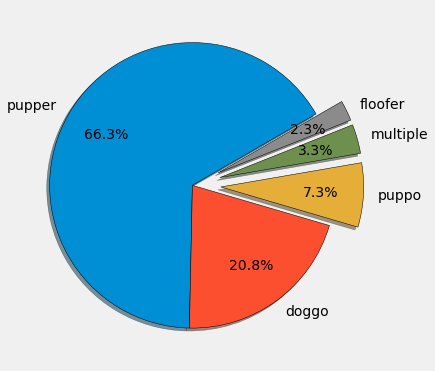

In [110]:
# determining the distribution of dog_stage across all data
explode = [0,0,0.2,0.2,0.2]

plt.figure(figsize=(6,6))

plt.pie(df_twitter['dog_stage'].value_counts(), labels=stage.index, startangle=30, 
       autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, explode=explode, pctdistance=0.7, shadow=True)

plt.tight_layout()

plt.savefig('pie.png', dpi=300)

plt.show()

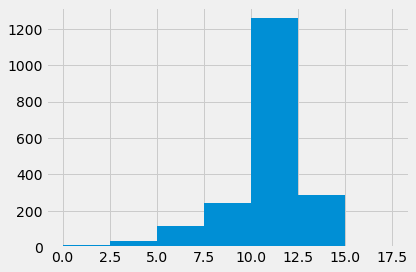

In [111]:
# distribution of score ( all score in denomerator is 10)
bins_1= np.arange(0,20,2.5)

plt.hist(df_twitter['rating_numerator'], bins=bins_1)

plt.tight_layout()

plt.savefig('hist.png', dpi=200)

plt.show()

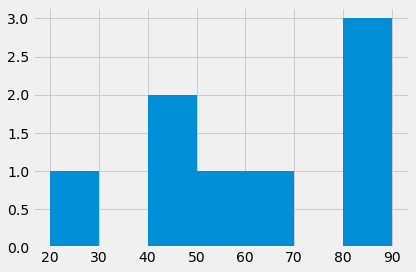

In [112]:
# mapping of outlier values in the rating 
bins_2= np.arange(20,100,10)

plt.hist(df_twitter['rating_numerator'], bins=bins_2)

plt.tight_layout()

plt.show()

In [113]:
#Time Frame of collected tweets
df_twitter['timestamp'].min() , df_twitter['timestamp'].max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [114]:
# Most common dog names
df_twitter.dog_name.value_counts()[:5]

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
Name: dog_name, dtype: int64

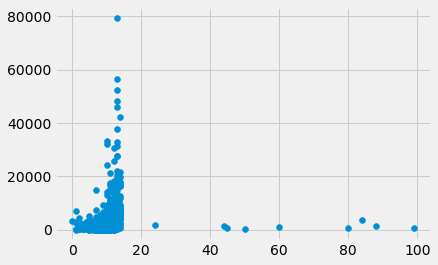

In [115]:
# Relationship between retweet_count and rating_numberator
plt.scatter(x=df_twitter.rating_numerator, y=df_twitter.retweet_count)

plt.show()

# remove outlier

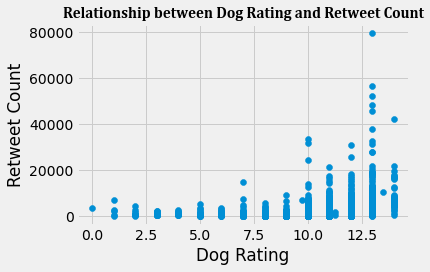

In [116]:
df_filt = df_twitter[df_twitter['rating_numerator']<20]

plt.scatter(x=df_filt.rating_numerator, y=df_filt.retweet_count)

plt.title('Relationship between Dog Rating and Retweet Count',
          fontdict={'fontweight':'bold', 'fontsize':15, 'fontname':'cambria'})

plt.xlabel('Dog Rating')

plt.ylabel('Retweet Count')

plt.tight_layout()

plt.savefig('scatter.png', dpi=300)

plt.show()

## There seems to be direct relationship as dog rating increases .. The retweet count increases

### Example of Error in Handling datetime

In [119]:
df_twitter['timestamp'].dtype

datetime64[ns, UTC]

In [120]:
df_twitter['timestamp'].min(), df_twitter['timestamp'].max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [121]:
# get error when trying to split the data on weekly basis
# Type Error although it has the dtype datetime64 .. How to fix that ??
df_twitter['timestamp'].resample('W')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'